In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("E:/DataSets/spam.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Dropping columns with many null values
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
#Rennaming Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(1)

,target,text
2854,ham,Your gonna be the death if me. I'm gonna leave...


In [11]:
df['target'].replace({'spam':1,'ham':0},inplace=True)

In [12]:
df.sample(5)

,target,text
4155,0,"Yo, call me when you get the chance, a friend ..."
3703,0,Kent vale lor... ÌÏ wait 4 me there ar?
968,0,Are you willing to go for aptitude class.
2070,1,Sexy Singles are waiting for you! Text your AG...
3416,0,But i haf enuff space got like 4 mb...


In [13]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#Duplicate Value
df.duplicated().sum()

403

In [15]:
#Removing Duplicate
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.shape

(5169, 2)

In [17]:
df.duplicated().sum()

0

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [19]:
#checking count of ham and spam
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
#plotting
import matplotlib.pyplot as plt

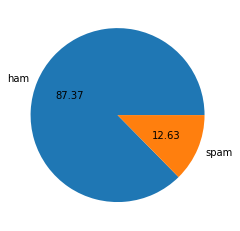

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#data is imbalanced

In [23]:
# Adding Extra imformation of sms

In [24]:
import nltk

In [25]:
# nltk.download('punkt')

In [26]:
#calculate number of characters in each sms
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
#number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [29]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
# number of sentences
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
#Modified dataframe
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [34]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [35]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

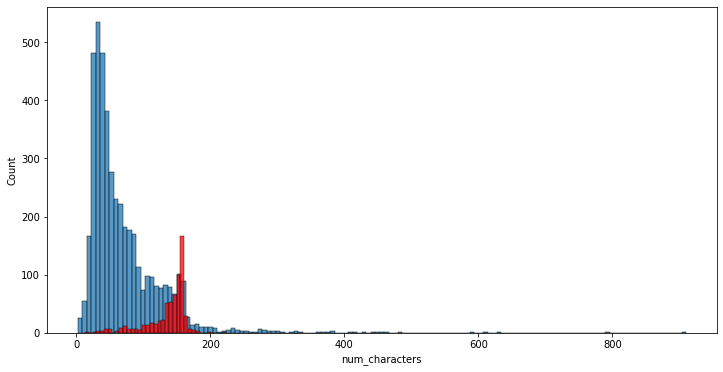

In [37]:
# characters comparison between ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0].num_characters)
sns.histplot(df[df['target']==1].num_characters,color='r')
plt.show()

In [38]:
# From this distribution we can clearly see that spam has more
# no of character in compared to ham

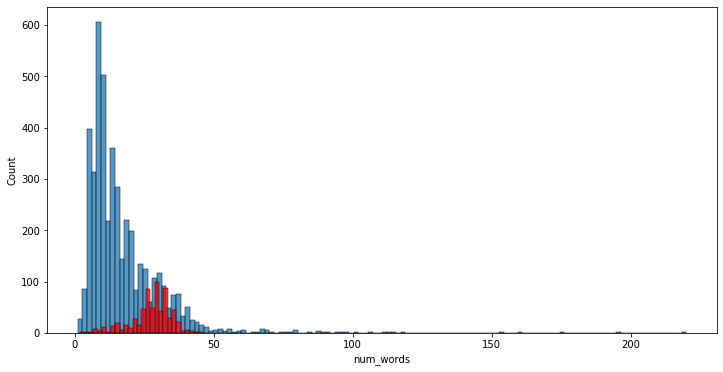

In [39]:
# words comparison between ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0].num_words)
sns.histplot(df[df['target']==1].num_words,color='r')
plt.show()

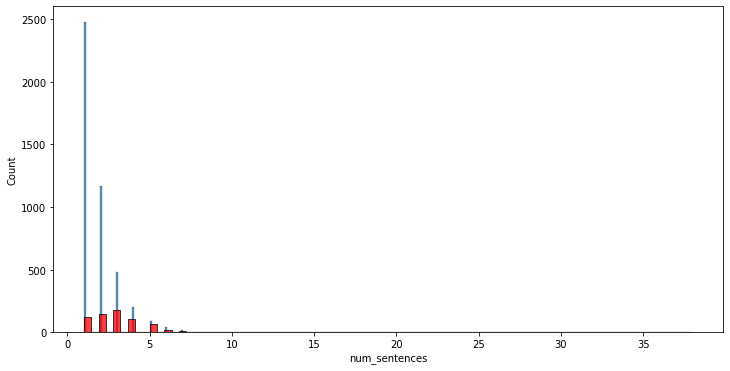

In [40]:
# sentence comparison between ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0].num_sentences)
sns.histplot(df[df['target']==1].num_sentences,color='r')
plt.show()

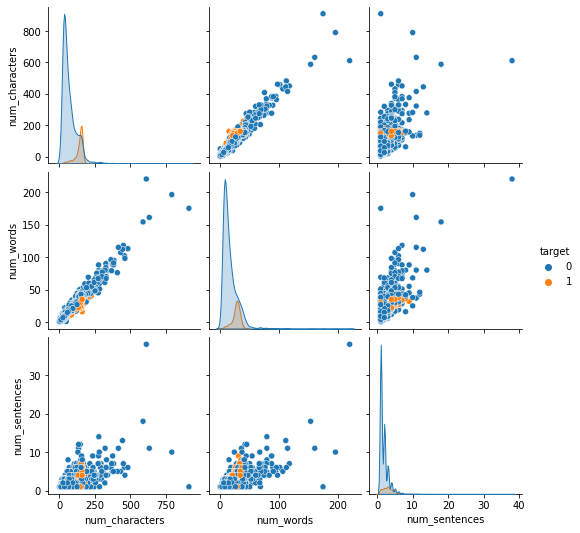

In [41]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

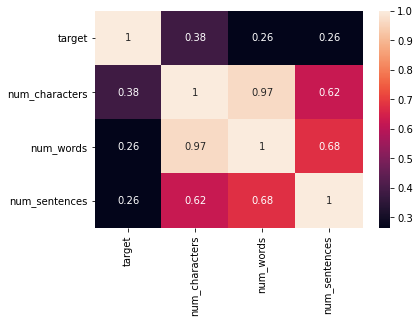

In [42]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

### For Textual Data
 - lowercase
 - Tokenization
 - Removing Special Words
 - Removing stop words and punctuation
 - Stemming And Lemmatization

In [43]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    stop_words=stopwords.words('english')
    punctuations=string.punctuation
    ps=PorterStemmer()
    for i in text:
        if i.isalnum() and i not in stop_words and i not in punctuations:
            y.append(ps.stem(i))
    return " ".join(y)

In [45]:
# stopwords.words('english')

In [46]:
# string.punctuation

In [47]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
#wordcloud - word that appeared most have bigger the size

In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(background_color='white')

In [52]:
#for spam
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

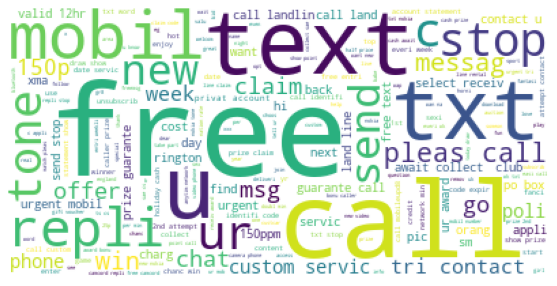

In [53]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

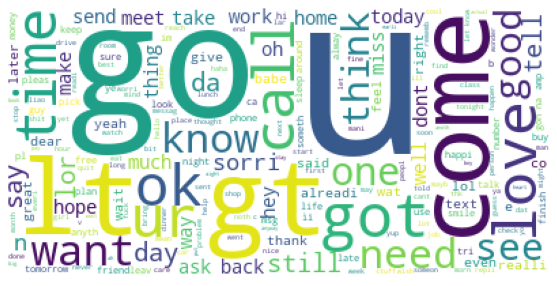

In [54]:
#for ham
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
rcParams["figure.figsize"] = (10,5)
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB  

In [56]:
tv=TfidfVectorizer(max_features=3000)

In [57]:
X=tv.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 3000)

In [59]:
y=df['target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

In [62]:
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
predicted_categories=gnb.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

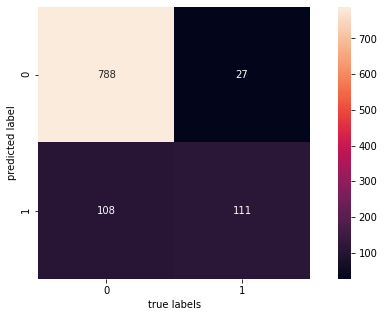

In [65]:
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [66]:
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is {}".format(precision_score(y_test, predicted_categories)))
print("The recall is {}".format(recall_score(y_test, predicted_categories)))
print("The f1 score is {}".format(f1_score(y_test, predicted_categories)))

The accuracy is 0.8694390715667312
The precision is 0.5068493150684932
The recall is 0.8043478260869565
The f1 score is 0.6218487394957983


In [67]:
mnb.fit(X_train,y_train)
predicted_categories=mnb.predict(X_test)

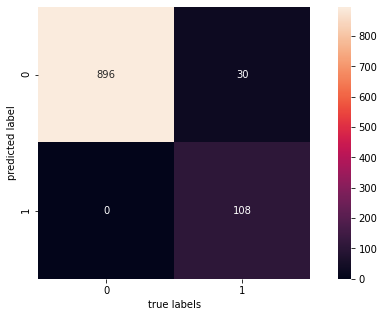

In [68]:
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [69]:
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is {}".format(precision_score(y_test, predicted_categories)))
print("The recall is {}".format(recall_score(y_test, predicted_categories)))
print("The f1 score is {}".format(f1_score(y_test, predicted_categories)))

The accuracy is 0.9709864603481625
The precision is 1.0
The recall is 0.782608695652174
The f1 score is 0.878048780487805


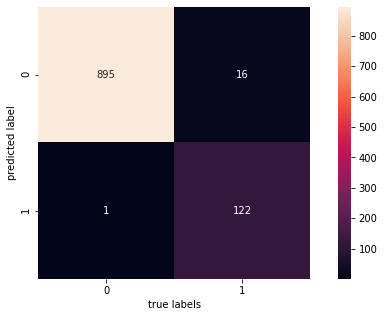

In [70]:
bnb.fit(X_train,y_train)
predicted_categories=bnb.predict(X_test)
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [71]:
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is {}".format(precision_score(y_test, predicted_categories)))
print("The recall is {}".format(recall_score(y_test, predicted_categories)))
print("The f1 score is {}".format(f1_score(y_test, predicted_categories)))

The accuracy is 0.9835589941972921
The precision is 0.991869918699187
The recall is 0.8840579710144928
The f1 score is 0.9348659003831418


In [72]:
import pickle

In [74]:
pickle.dump(tv,open('E:\DataSets\pickle_files\sms_vectorizer.pkl','wb'))
pickle.dump(mnb,open('E:\DataSets\pickle_files\sms_model.pkl','wb'))